<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


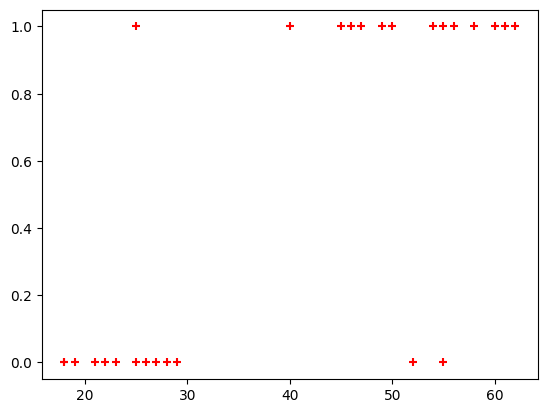

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,random_state=43)

In [6]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.0150335 , 0.9849665 ],
       [0.0206307 , 0.9793693 ],
       [0.94814392, 0.05185608],
       [0.91854475, 0.08145525],
       [0.04501788, 0.95498212],
       [0.89095551, 0.10904449]])

In [12]:
model.score(X_test,y_test)

0.8333333333333334

In [13]:
y_predicted

array([1, 1, 0, 0, 1, 0])

In [14]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


**model.coef_ indicates value of m in y=m*x + b equation**

In [15]:
model.coef_

array([[0.16109911]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [16]:
model.intercept_

array([-5.80581805])

**Lets defined sigmoid function now and do the math with hand**

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.161 * age - 5.80
    y = sigmoid(z)
    return y

In [19]:
age = 30
prediction_function(age)

0.27488050221017696

**0.274 is less than 0.5 which means person with 35 age will *not* buy insurance**


In [20]:
age = 43
prediction_function(age)

0.7545447615401272

Epoch 0, Loss: 0.6915864277782613
Epoch 100, Loss: 0.6630519117084908
Epoch 200, Loss: 0.6627454708042058
Epoch 300, Loss: 0.6627387769470106
Epoch 400, Loss: 0.6627385841750829
Epoch 500, Loss: 0.6627385774777403
Epoch 600, Loss: 0.6627385771775013
Epoch 700, Loss: 0.6627385771567111
Epoch 800, Loss: 0.662738577154266
Epoch 900, Loss: 0.6627385771538582


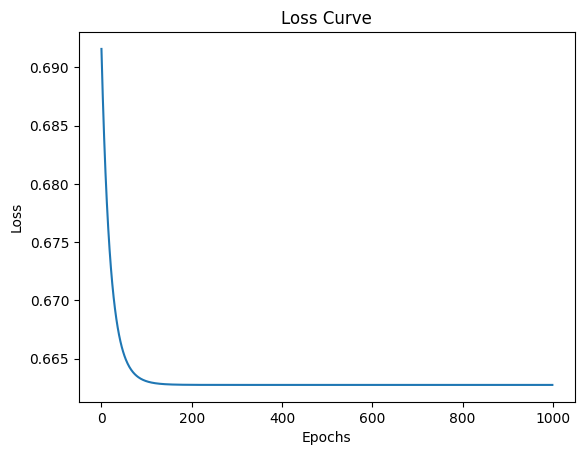

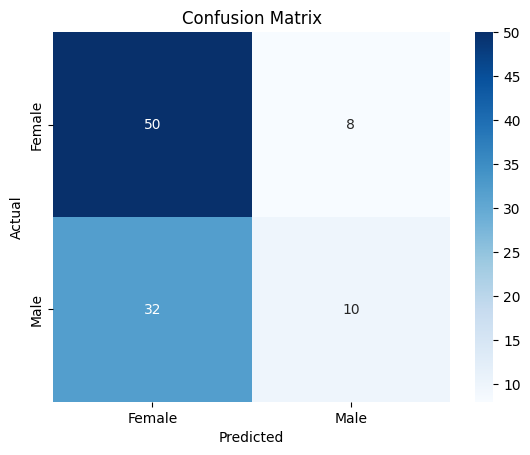

              precision    recall  f1-score   support

      Female       0.61      0.86      0.71        58
        Male       0.56      0.24      0.33        42

    accuracy                           0.60       100
   macro avg       0.58      0.55      0.52       100
weighted avg       0.59      0.60      0.55       100



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ---------------------------
# Step 1: Define Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 2: Define Loss Function
# ---------------------------
def compute_loss(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Small value to avoid log(0)
    loss = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return loss

# ---------------------------
# Step 3: Define Gradient Descent
# ---------------------------
def gradient_descent(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []
    
    for i in range(epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= lr * gradient
        
        # Compute and store loss
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
        
        # Optional: Print loss every 100 epochs
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss}")
    
    return theta, loss_history

# ---------------------------
# Step 4: Prepare Data (Example)
# ---------------------------
# Note: Replace this with your actual data preparation
# This is just a placeholder example
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
y = np.random.randint(0, 2, 100)  # Binary target

# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [22]:
# ---------------------------------------------
# EMPLOYEE RETENTION ANALYSIS
# Using pandas, numpy, matplotlib, and sklearn
# ---------------------------------------------

In [23]:
# ============
# Part 1 — Data Loading and Overview
# ============

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# Preview the data
print("First 5 rows:")
print(df.head(), "\n")

print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  


In [24]:
# ============
# Part 2 — Exploratory Data Analysis (EDA)
# ============

print("\nEmployees who left vs stayed:")
print(df['left'].value_counts())

# Basic statistics
print("\nSummary statistics:")
print(df.describe())

# Compare averages between employees who left and stayed
retention_summary = df.groupby('left').mean(numeric_only=True)
print("\nAverage values grouped by employee retention (0=stayed, 1=left):")
print(retention_summary)


Employees who left vs stayed:
left
0    11428
1     3571
Name: count, dtype: int64

Summary statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min             

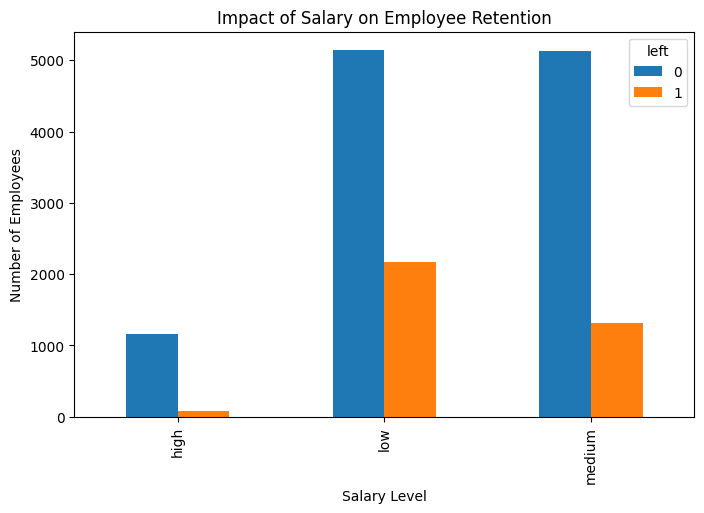

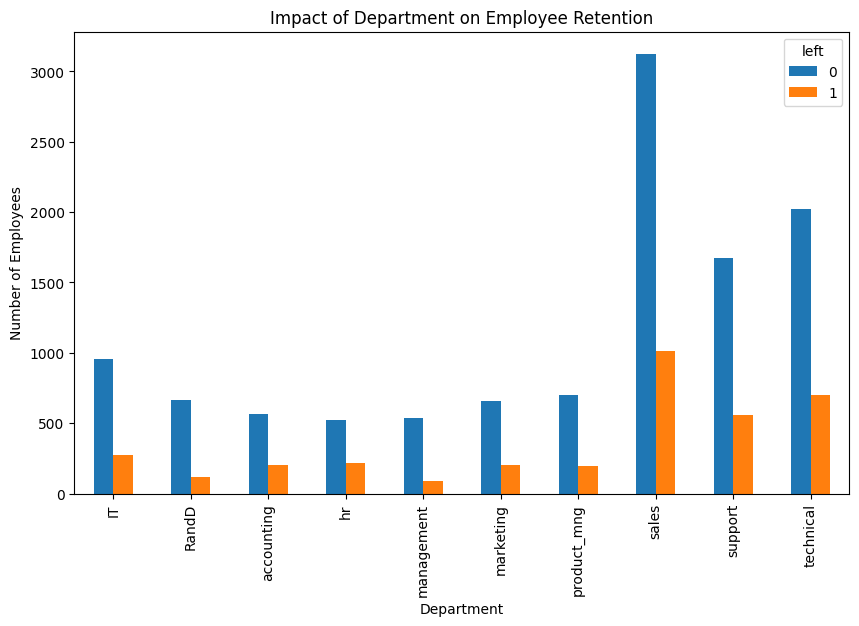

In [25]:
# ============
# Part 3 — Visual Analysis
# ============

# Salary vs Retention
pd.crosstab(df.salary, df.left).plot(kind='bar', figsize=(8,5))
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

# Department vs Retention
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(10,6))
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

⚠️ Warning: All salary values were unmapped. Filling with default = medium (1).
NaN count before cleaning:
 satisfaction_level      0
average_montly_hours    0
number_project          0
salary                  0
dtype: int64

Any NaNs left after cleaning? False
✅ Model training complete.

Model Accuracy: 76.77 %

Confusion Matrix:
 [[2139  155]
 [ 542  164]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.51      0.23      0.32       706

    accuracy                           0.77      3000
   macro avg       0.66      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000



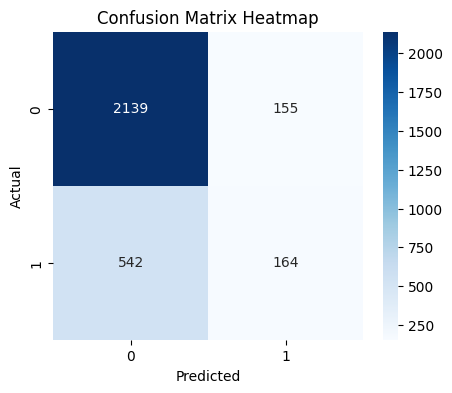

In [27]:
# ============
# Part 4 — Feature Selection (with NaN cleanup)
# ============

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Normalize and map salary column
df['salary'] = df['salary'].astype(str).str.strip().str.lower()
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# If mapping failed and all became NaN, fill with default (medium = 1)
if df['salary'].isna().all():
    print("⚠️ Warning: All salary values were unmapped. Filling with default = medium (1).")
    df['salary'] = 1
else:
    # Fill remaining missing salary values with mode or default = 1
    if df['salary'].mode().empty:
        df['salary'].fillna(1, inplace=True)
    else:
        df['salary'].fillna(df['salary'].mode()[0], inplace=True)

# Select important features
features = df[['satisfaction_level', 'average_montly_hours', 'number_project', 'salary']]
target = df['left']

# Check how many NaNs exist before handling
print("NaN count before cleaning:\n", features.isna().sum())

# Drop rows with remaining NaNs
data = pd.concat([features, target], axis=1).dropna()

# Separate cleaned features and target
X = data[['satisfaction_level', 'average_montly_hours', 'number_project', 'salary']]
y = data['left']

# Double-check NaN status
print("\nAny NaNs left after cleaning?", X.isna().any().any())


# ============
# Part 5 — Model Building
# ============

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features for numerical stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

print("✅ Model training complete.")


# ============
# Part 6 — Model Evaluation
# ============

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
